<a href="https://colab.research.google.com/github/yabbou/python-data-science/blob/main/hw_4_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
--
The Wolrd Happiness report scores national "happiness" according to economic production, social support, mental health, freedom, among other factors. 

**Question. What factors (do we think) make nations happy?** What trends can be found among countries whose citizens declare internal satisfaction? Are any primary factors not considered?

Summary
==
World Happiness Report data, from years 2015 until 2019. 

Six factors are considered to calculate the country's happiness score:

1. GDP per Capita, 
2. Family, 
3. Life Expectancy, 
4. Freedom, 
5. Generosity, and 
6. Trust Government Corruption

Clean the Data
==
Check for null data, missing data, outliers, and errors. 

First, load happiness statistics for five years.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

h_2015 = pd.read_csv('https://raw.githubusercontent.com/yabbou/python-data-science/main/hw_3/World_Happiness/2015.csv')
h_2016 = pd.read_csv('https://raw.githubusercontent.com/yabbou/python-data-science/main/hw_3/World_Happiness/2016.csv')
h_2017 = pd.read_csv('https://raw.githubusercontent.com/yabbou/python-data-science/main/hw_3/World_Happiness/2017.csv')
h_2018 = pd.read_csv('https://raw.githubusercontent.com/yabbou/python-data-science/main/hw_3/World_Happiness/2018.csv')
h_2019 = pd.read_csv('https://raw.githubusercontent.com/yabbou/python-data-science/main/hw_3/World_Happiness/2019.csv')

Get a sample of the data with `.head()`

In [ ]:
h_2015.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Check is any null data exists.

In [ ]:
h_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

*Perfect*! No null data to clean. 

How varied is the data?

In [ ]:
h_2015.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

Pretty diverse!

Checking for outliers would be necessary for every factor. Let's pick some of the main ones.

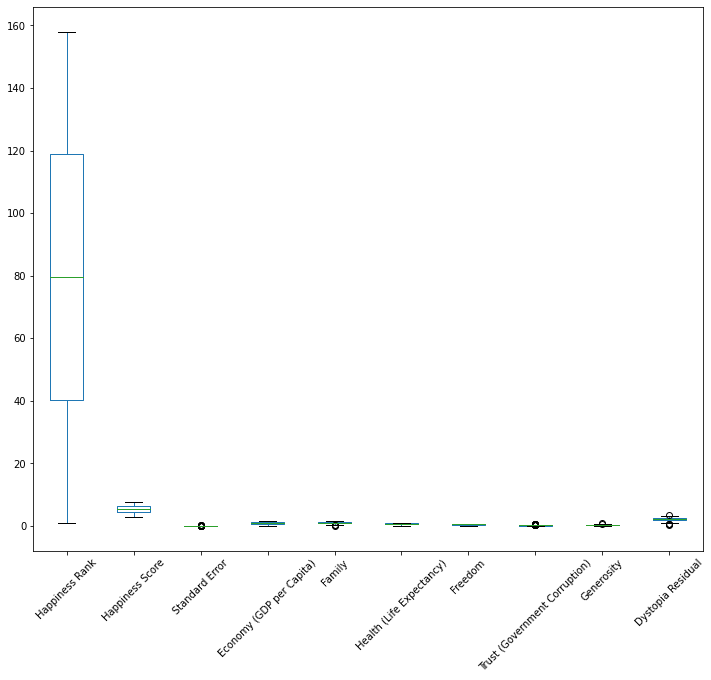

In [ ]:
boxplot = h_2015.boxplot(grid=False, rot=45,figsize=(12,10))

There appear to be outliers for some columns, but not so clearly seen since the values in `Happiness Rank` extend a larger range of numbers. Let's narrow our scope to exclude those earlier columns.

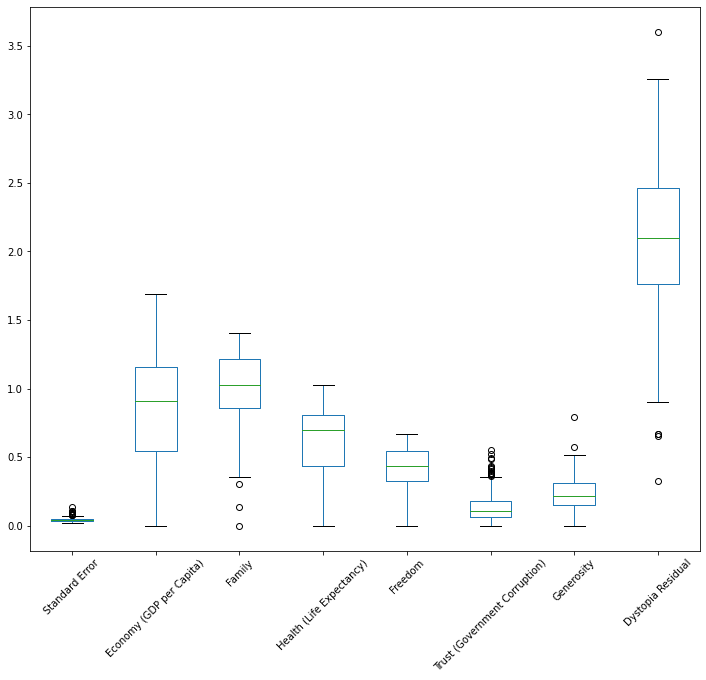

In [ ]:
boxplot = h_2015.iloc[:,4:].boxplot(grid=False, rot =45,figsize=(12,10))

Now to narrow down to the column with the most outliers: **Governemnt trust**.

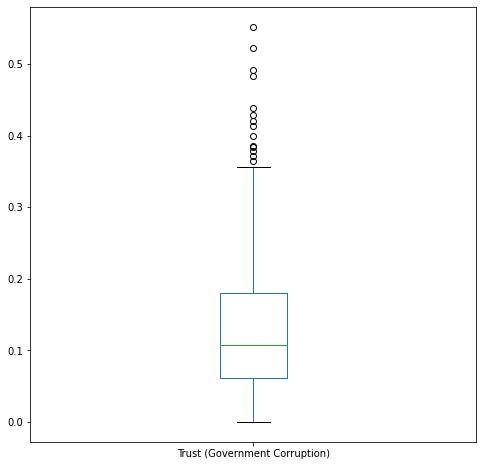

In [ ]:
# Outliers: 'Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'
boxplot = h_2015.loc[:,['Trust (Government Corruption)']].boxplot(grid=False,figsize=(8,8))

The lower boundary of the outliers appers to be valued at `0.35`. Which countries have their government trust unusually contribuing to their happiness score?

In [ ]:
outliers_gov = h_2015.loc[h_2015['Trust (Government Corruption)']>.35]
print('Number of outliers:',outliers_gov.shape[0])
outliers_gov

Number of outliers: 15


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501


In [ ]:
outliers[outliers['Happiness Rank']<=10].shape[0]

7

Interesting. Of the top ten highest scoring countries, __seven__ have government trust scores that contirbute to their overall happiness scores! So perhaps a (relatively) high distrust of government truthfulness is a factor in perceived national happiness... 

How are the `Family` outliers?

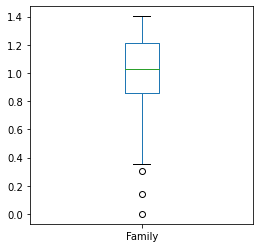

In [ ]:
h_2015_fam = h_2015.loc[:,['Family']] 
boxplot = h_2015_fam.boxplot(grid=False,figsize=(4,4))

In [ ]:
outliers_fam = h_2015.loc[h_2015['Family']<.35]
print('Number of outliers:',outliers_fam.shape[0])
outliers_fam

Number of outliers: 3


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


There are not too many outliers from `Family` to critically remove them. And their unusually low value fit in with their lower overall `Happiness Score`.

Data Analysis
==
Which factors correlate most with a country's happiness score?


In [ ]:
h_2015_factors_only = h_2015.copy().drop(['Happiness Rank','Dystopia Residual','Standard Error'], axis=1)
happiness_score_corr = h_2015_factors_only.corr().iloc[1:,0].sort_values(ascending=False)
print(happiness_score_corr)

Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Name: Happiness Score, dtype: float64


So high `Economy` appears to correlate the most with a country's happiness score! 

How about in 2019?

In [ ]:
h_2019_wo_rank = h_2019.copy().drop(['Overall rank'], axis=1)
happiness_score_corr = h_2019_wo_rank.corr().iloc[1:,0].sort_values(ascending=False)
print(happiness_score_corr)

GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64


About the same order of priority. Life expectancy did rise slightly above family and social support, yet both remaining in the top 2nd and 3rd positions.

_Now, how do each factor correlate with a country's score? And perhpas more visually..._

###Top factor: **GDP per capita**

Median: 0.91 Mean: 0.85


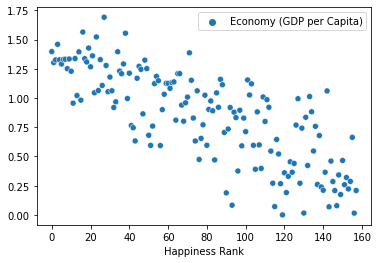

In [ ]:
def scatterPlotWithStats(start_index,stop_index,step,col):
  h_2015_factor = h_2015.loc[start_index:stop_index:step,[col]] 
  scatter = sb.scatterplot(data=h_2015_factor).set(xlabel='Happiness Rank')

  mid = h_2015_factor.median()[0]
  avg = h_2015_factor.mean()[0]
  print(f'Median: {mid:.2f} Mean: {avg:.2f}')
  return scatter

def scatterPlotWithStatsDefault(col):
  TOTAL_ROWS = 157
  scatterPlotWithStats(0,TOTAL_ROWS,1,col)

scatterPlotWithStatsDefault('Economy (GDP per Capita)')

A fair general correlation: the higher the gdp, the higher the happiness rank!

How about the top and bottom ten highest gdp countries? 

In [ ]:
GDP = 'Economy (GDP per Capita)'
COLS = ['Happiness Rank','Country','Region',gdp]
h_2015_gdp_head = h_2015.copy().loc[:9,COLS].sort_values(by=GDP,ascending=False).reset_index()

mode = h_2015_gdp_head.mode()['Region'][0]
mode_count = h_2015_gdp_head.loc[h_2015_gdp_head['Region']==mode].count()['index']
print(f'Most commmon region: {mode} ({mode_count}/10)')

h_2015_gdp_head.drop(['index'],axis=1)

Most commmon region: Western Europe (7/10)


,Happiness Rank,Country,Region,Economy (GDP per Capita)
0,4,Norway,Western Europe,1.45900
1,1,Switzerland,Western Europe,1.39651
2,10,Australia,Australia and New Zealand,1.33358
3,8,Sweden,Western Europe,1.33171
4,7,Netherlands,Western Europe,1.32944
5,5,Canada,North America,1.32629
6,3,Denmark,Western Europe,1.32548
7,2,Iceland,Western Europe,1.30232
8,6,Finland,Western Europe,1.29025
9,9,New Zealand,Australia and New Zealand,1.25018


In [ ]:
h_2015_gdp_tail = h_2015.copy().loc[148:157,COLS].sort_values(by=GDP,ascending=False).reset_index()

mode = h_2015_gdp_tail.mode()['Region'][0]
mode_count = h_2015_gdp_tail.loc[h_2015_gdp_tail['Region']==mode].count()['index']
print(f'Most commmon region: {mode} ({mode_count}/10)')

h_2015_gdp_tail.drop(['index'],axis=1)

Most commmon region: Sub-Saharan Africa (8/10)


,Happiness Rank,Country,Region,Economy (GDP per Capita)
0,156,Syria,Middle East and Northern Africa,0.66320
1,151,Ivory Coast,Sub-Saharan Africa,0.46534
2,149,Chad,Sub-Saharan Africa,0.34193
3,153,Afghanistan,Southern Asia,0.31982
4,155,Benin,Sub-Saharan Africa,0.28665
5,152,Burkina Faso,Sub-Saharan Africa,0.25812
6,154,Rwanda,Sub-Saharan Africa,0.22208
7,158,Togo,Sub-Saharan Africa,0.20868
8,150,Guinea,Sub-Saharan Africa,0.17417
9,157,Burundi,Sub-Saharan Africa,0.01530


Fascinating. Both the top and bottom ten countries in gdp are the *exact* top and bottom ten happiness ranked countries! Though, the other factors evidently contribute to the overall ranking, as they are not in a linear order. 

###How about factor number two: **Family**.

Median: 1.03 Mean: 0.99


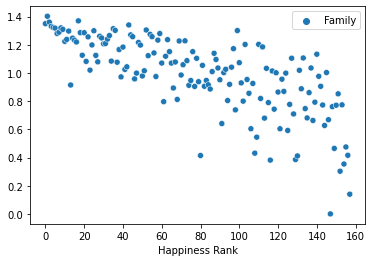

In [ ]:
scatterPlotWithStatsDefault('Family')

Similar to `GDP`: the higher the happiness rank, the higher the family score had been. Though, the *average* score appear highers-- slightly closer to the median than in the GDP chart.

###Next factor, close behind the second factor is: **Life Expectancy**.

(0.0, 1.2)

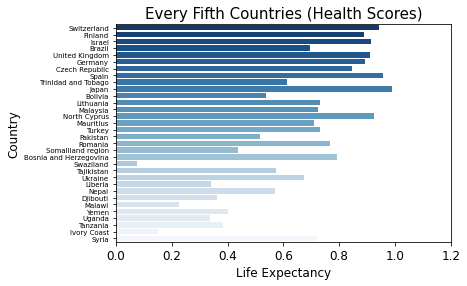

In [ ]:
import matplotlib.pyplot as plt

h_2015_health = h_2015.loc[::5,['Country','Happiness Score','Health (Life Expectancy)']]
bar = sb.barplot(y=h_2015_health['Country'], x=h_2015_health['Health (Life Expectancy)'], palette='Blues_r', orient='h')

plt.title('Every Fifth Countries (Health Scores)', fontsize=15)
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=7)
plt.xlim(0, 1.2)
#increase height

A general similar trend; though Japan and Syria, among others, are indeed noticabe outliers.

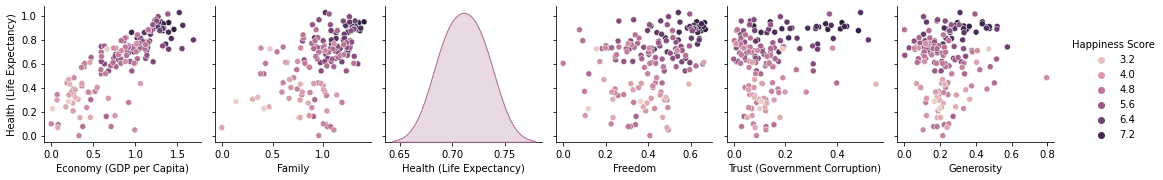

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sb.pairplot(h_2015_factors_only, hue='Happiness Score', y_vars='Health (Life Expectancy)')

Higher happienss scores appear to correlate with countires that have both higher `Life Expectancy` scores and `GDP` or `Family` scores, but less linearly `Freedom`, `Government Trust`, and `Generosity` scores.

###Factor four: **Freedom to make life choices**. 


Median: 0.44 Mean: 0.43


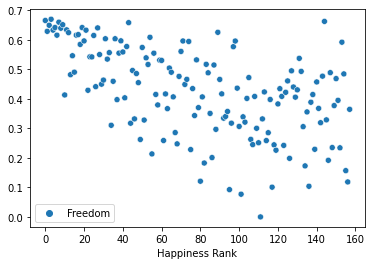

In [ ]:
scatterPlotWithStatsDefault('Freedom')

As expected. A similar trend. Indeed, slightly more spread out in values. There seems to be a high concentration in the top twenty. Let's check that.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

def bokehLineGraph(start_index,stop_index,step,col):
  graph = figure(x_axis_label='Happiness Rank',y_axis_label='Freedom',plot_width=300, plot_height=200)
  freedom_values = list(np.array(h_2015.loc[start_index:stop_index:step,['Freedom']]))
  graph.line(x=range(start_index,stop_index+1), y=freedom_values)
  show(graph)

bokehLineGraph(0,20,1,'Freedom')
bokehLineGraph(20,50,1,'Freedom')
bokehLineGraph(50,70,1,'Freedom') #find plt.subplot(1,3,2) alternative

So the top twenty have a stable decline... and the next fourty are much more diverse over a larger range of scores! 

There are definitely some outliers, but overall the `Happiness Rank` decreases.

###Next: **Perceptions of corruption**

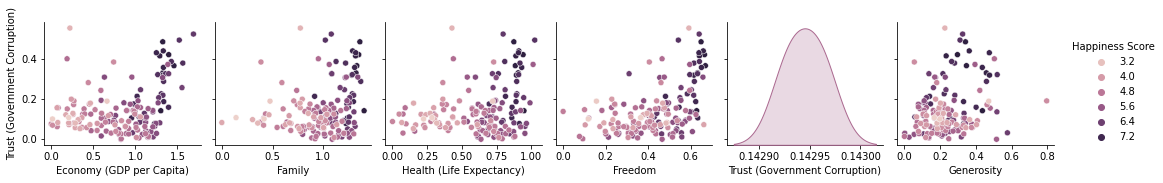

In [ ]:
TRUST = 'Trust (Government Corruption)'
sb.pairplot(h_2015_factors_only, hue='Happiness Score', y_vars=TRUST)

Government trust does not appear to correlate with any other factors and its `Happiness Score`. The higher happiness scores do appear to consist of high government _distrust_, but the lower scoring countries have sudden drop in distrust. (And no apparent correlation with `Generosity`.)

In [ ]:
import plotly.express as px

MAX = h_2015_factors_only.loc[:,[TRUST]].max()[0]
figure = px.choropleth(h_2015, locations="Country",locationmode="country names",hover_name="Country",hover_data=['Happiness Rank'],
                       color=TRUST,range_color=[0,MAX],color_continuous_scale="tropic")
figure.show()

*Wow, this tool is amazing!* Thank God we are obligated to learn how to use it. 

So from this super conventinent map, contries with higher distrust are happier. But as seen before, the trend does not necessarily follow for the rest of the countries. (Clear exception is Rwanda, in the middle of African trusting neighbours, but still with a low happiness ranking.)

###Last Factor: **Generosity**

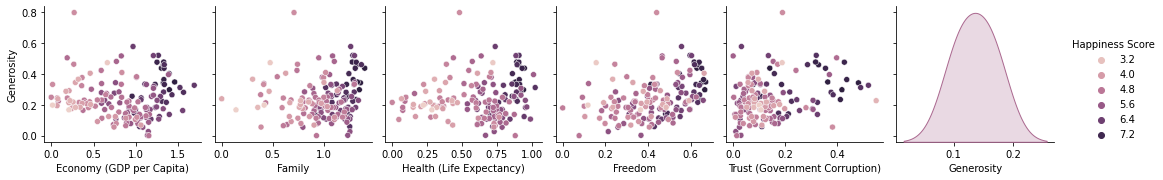

In [ ]:
GEN = 'Generosity'
sb.pairplot(h_2015_factors_only, hue='Happiness Score', y_vars=GEN)

Median: 0.22 Mean: 0.24


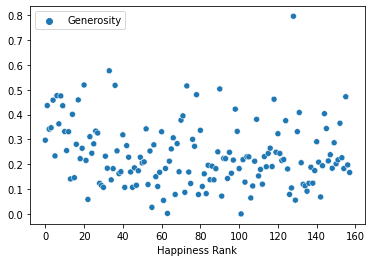

In [ ]:
scatterPlotWithStatsDefault(GEN)

The `Generosity` scores seem to be about the same throughout. 

Though, I would assume and hope eventually, some of these later factors-- namely, `Freedom` and ``--